# Final Assignment

### Seven Sins Restobar

A new restaurant startup has born in German Village, and three people are working very extensive hours to make things happen. The entry barriers are high, as there is such a huge contest against big companies to attract people that could buy their products/services. 

As an EVS new initiative, the idea is to support new local businesses to achieve prosperity in the region, and you were selected to develop a study that could lead them to improve their results.

The success is vital for these people, as their growth will bring new people and increase employment.

With a bunch of effort and energy, they have been collecting reviews from friends, family and new customers, and they have stored them in a tiny dataset, which consists in two features:

    -The restaurant review
    -The thumb of nail critic: They did or did not like the service received.
    
Right now, they don’t have enough time to conduct any sort type of analysis coming from them. So they don’t know what to do in terms of strategy.

As a data science analyst, you are requested to perform an analysis on the data that they have and give them some feedback. Your critical thinking is your best friend for developing a case, and support it with data driven conclusions.

But you’re not alone in this process: You are part of a talented people team, and all of you are using this opportunity to escalate and generate more impact in our community. The person in charge only expects from you a Python code (.py file), with the possibility to include comments and all sort type of data driven analysis (Markdown is your friend). Due the lack of time and resources available: Your opinion and recommendations will only be considered if they are clear and follow a convincing and clear path and objective.

There have 500 labeled reviews (Liked 1; Disliked: 0).

They have other 500 reviews, but unlabeled: A model is required for classifying them.

Your boss requires a python (.py) file that includes:

   -	Dataset review (descriptive)
   -	Pre-processing steps and methods.
   -	Define a main objective: What is the object of your study? To analyze the relation of certain type of products/services with the feedback? Detect things that lead people to write positive/negative reviews? A mixture? To classify new upcoming reviews? Why?
   -	The feature engineering process (techniques used, commented).
   -	A model selection process (parameters, candidates, selected (why?) and evaluated metrics).
   -	Analysis based in selected model.
   -	Final conclusion and recommendation(s) (be concise) 


#### Import Libraries

In [249]:
import pandas as pd 
import numpy as np
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus import wordnet

from textblob import TextBlob

from sklearn.feature_extraction.text import CountVectorizer #Class that allows tokenization

from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
#!pip install tabulate
from tabulate import tabulate
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

from sklearn.naive_bayes import GaussianNB

#### Import Data

In [199]:
#sorry I misunderstood all the problem and I worked with another data for 2 hours, so this was the best I could do.
df_c = pd.read_csv("Seven_Sins_Restobar.tsv",sep=r'\t')
df_c.tail() 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


Review  Liked
495  "Worse of all, he humiliated his worker right ...      0
496                    CONCLUSION: Very filling meals.      1
497  Their daily specials are always a hit with my ...      1
498  The pancake was also really good and pretty la...      1
499  "This was my first crawfish experience, and it...      1

#### Pre-processing Data

In [202]:
df_like = df_c[df_c['Liked']==1]

df_dislike =df_c[df_c['Liked']==0]

In [203]:
df_like = df_like.drop(columns='Liked')

df_dislike = df_dislike.drop(columns='Liked')

In [204]:
len(df_c)

500

In [258]:
corpus = []

for i in range(0, len(df_c)):   
    review = re.sub('[^a-zA-Z]', ' ', df_c['Review'][i]) #Removes all but letters (and Capitals)
    review = review.lower() #Put all the letters in lowercase
    review = review.split() #Creates a list of different words
    ps = PorterStemmer() #We use Stemming for taking the root of words
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review) #For reversing the process (list -> string)
    corpus.append(review) #Generate a list of one string per observation

In [252]:
corpus_str = ' '.join([str(elem) for elem in corpus])

In [253]:
corpus_str = TextBlob(corpus_str)

In [257]:
tokens = [t for t in corpus_str.split()] 
tokens

['also',
 'tast',
 'mom',
 'multi',
 'grain',
 'pumpkin',
 'pancak',
 'pecan',
 'butter',
 'amaz',
 'fluffi',
 'delici',
 'rather',
 'eat',
 'airlin',
 'food',
 'serious',
 'cant',
 'say',
 'enough',
 'good',
 'thing',
 'place',
 'ambianc',
 'incred',
 'waitress',
 'manag',
 'friendli',
 'would',
 'recommend',
 'place',
 'overal',
 'impress',
 'noca',
 'gyro',
 'basic',
 'lettuc',
 'terribl',
 'servic',
 'thoroughli',
 'disappoint',
 'much',
 'pasta',
 'love',
 'homemad',
 'hand',
 'made',
 'pasta',
 'thin',
 'pizza',
 'give',
 'tri',
 'happi',
 'far',
 'best',
 'cheesecurd',
 'ever',
 'reason',
 'price',
 'also',
 'everyth',
 'perfect',
 'night',
 'food',
 'good',
 'typic',
 'bar',
 'food',
 'drive',
 'get',
 'first',
 'glanc',
 'love',
 'bakeri',
 'cafe',
 'nice',
 'ambianc',
 'clean',
 'friendli',
 'staff',
 'anyway',
 'think',
 'go',
 'back',
 'point',
 'finger',
 'item',
 'menu',
 'order',
 'disappoint',
 'oh',
 'thing',
 'beauti',
 'bar',
 'gone',
 'go',
 'greasi',
 'unhealthi',


In [259]:
freq = nltk.FreqDist(tokens)
 
for key,val in freq.items():
 
    print (str(key) + ':' + str(val)) 

also:16
tast:13
mom:1
multi:1
grain:1
pumpkin:1
pancak:2
pecan:1
butter:2
amaz:15
fluffi:1
delici:9
rather:3
eat:14
airlin:1
food:64
serious:4
cant:1
say:12
enough:7
good:47
thing:9
place:52
ambianc:3
incred:1
waitress:3
manag:7
friendli:13
would:13
recommend:11
overal:3
impress:6
noca:1
gyro:2
basic:1
lettuc:1
terribl:8
servic:42
thoroughli:1
disappoint:13
much:10
pasta:3
love:17
homemad:3
hand:3
made:7
thin:4
pizza:12
give:6
tri:11
happi:5
far:4
best:15
cheesecurd:1
ever:13
reason:4
price:12
everyth:6
perfect:10
night:6
typic:1
bar:17
drive:3
get:17
first:8
glanc:1
bakeri:1
cafe:1
nice:18
clean:6
staff:10
anyway:2
think:9
go:31
back:29
point:1
finger:1
item:1
menu:7
order:12
oh:2
beauti:4
gone:2
greasi:1
unhealthi:1
meal:11
time:22
might:1
last:5
burger:6
similarli:1
deliveri:1
man:1
word:2
apolog:1
minut:9
late:1
way:11
expens:1
sure:3
dessert:6
even:14
need:6
pack:2
tiramisu:1
cannoli:1
die:1
wait:18
next:1
bartend:2
tasti:4
two:6
thumb:3
vega:7
breakfast:5
check:5
sat:3
sun:1
auth

In [ ]:
synonyms = [] 
for syn in wordnet.synsets('Computer'): 
    for lemma in syn.lemmas(): 
        synonyms.append(lemma.name())
 
print(synonyms)

In [235]:
tokens = [t for t in review.split()]   #.split() by default split per each " "

tokens = TextBlob(review)

tokens = tokens.correct()

tokens.words


#ps = PorterStemmer()
#
#tokens = [ps.stem(word) for word in tokens.words if not word in set(stopwords.words('english'))]
#tokens

WordList(['also', 'last', 'mon', 'multi', 'grain', 'pushkin', 'pancake', 'can', 'butter', 'may', 'fluffy', 'device'])

In [208]:
freq = nltk.FreqDist(tokens)
for key,val in freq.items():
 
    print (str(key) + ':' + str(val))    #imprime la palabra que se encuentra, y la frecuencia con la que se encuentra ese valor.

thought:2
wonder:1
way:1
spend:1
time:1
hot:1
summer:1
weekend:1
sit:1
air:1
conduct:1
theater:1
watch:1
light:1
heart:1
comedy:3
plot:1
simplest:1
dialogue:1
witty:1
character:1
liable:1
even:1
well:1
bread:1
suspect:1
aerial:1
killer:1
may:2
disappoint:1
realize:1
match:1
point:1
risk:1
adduct:1
proof:1
wood:2
allen:1
still:1
full:1
control:1
style:1
man:1
us:1
grown:1
love:1
br:4
laugh:1
one:1
year:1
dare:1
say:1
dead:1
never:1
impress:1
scarlet:1
johnson:1
manage:1
tone:1
semi:1
image:1
jump:1
right:1
average:1
spirit:1
young:1
woman:1
crown:1
jewel:1
career:1
whittier:1
devil:1
wear:1
trade:1
interest:1
sherman:1
great:1
go:1
see:1
friend:1


#### Define a main objective:
   - What is the object of your study?
        - Understand if custumers are satisfaed with the food. 
   - To analyze the relation of certain type of products/services with the feedback?
   - Detect things that lead people to write positive/negative reviews? A mixture? To classify new upcoming reviews? Why?

In [110]:
corpus[0].sentiment

Sentiment(polarity=0.0015934065934065965, subjectivity=0.42281135531135533)

In [90]:
df_c[df_c['sentiment']==0].info()
df_c = df_c.reset_index()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 3 to 498
Data columns (total 2 columns):
review       263 non-null object
sentiment    263 non-null int64
dtypes: int64(1), object(1)
memory usage: 6.2+ KB


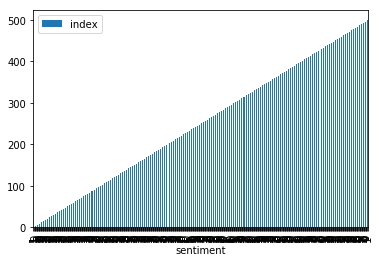

In [92]:
df_c.plot.bar(x='sentiment')

In [239]:
cv = CountVectorizer(max_features = 1000) #Keeping the 1000 more frequent words

X = cv.fit_transform(corpus).toarray() #Creation of the Sparsematrix

y = df_c.iloc[:, 1].values #Defining our response variable

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

classifier_nb = GaussianNB()
classifier_nb.fit(X_train, y_train)

# fit a Logistic Regression Model
classifier_lr = LogisticRegression(solver='lbfgs')
classifier_lr.fit(X_train, y_train)

# Predicting the Test set results
nb_y_pred = classifier_nb.predict(X_test)
lr_y_pred = classifier_lr.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
nb_cm = confusion_matrix(y_test, nb_y_pred)
print('Gaussian Confusion Matrix:\n',nb_cm)
lr_cm = confusion_matrix(y_test, lr_y_pred)
print('\nLogistic Regression Confusion Matrix:\n',lr_cm)

Gaussian Confusion Matrix:
 [[27 23]
 [ 6 44]]

Logistic Regression Confusion Matrix:
 [[35 15]
 [15 35]]


No Skill: 
		ROC AUC=0.500
Naive Bayes: 
		ROC AUC=0.710
Logistic: 
		ROC AUC=0.768


threshold  tpr  fpr
0          1  0.0  0.0
1          0  1.0  1.0

threshold   tpr   fpr
0        2.0  0.00  0.00
1        1.0  0.88  0.46
2        0.0  1.00  1.00

threshold   tpr   fpr
0    1.999911  0.00  0.00
1    0.999911  0.02  0.00
2    0.963908  0.10  0.00
3    0.952055  0.10  0.02
4    0.808690  0.34  0.02
5    0.794672  0.34  0.06
6    0.771599  0.40  0.06
7    0.751255  0.40  0.10
8    0.735760  0.42  0.10
9    0.733391  0.42  0.12
10   0.702609  0.52  0.12
11   0.697616  0.52  0.14
12   0.681008  0.54  0.14
13   0.676496  0.54  0.16
14   0.674784  0.56  0.16
15   0.663734  0.56  0.18
16   0.640720  0.58  0.18
17   0.634032  0.58  0.20
18   0.586230  0.64  0.20
19   0.567556  0.64  0.22
20   0.554834  0.66  0.22
21   0.544225  0.66  0.26
22   0.526270  0.70  0.26
23   0.485879  0.70  0.34
24   0.470072  0.72  0.34
25   0.466426  0.72  0.36
26   0.452494  0.76  0.36
27   0.428239  0.76  0.42
28   0.392767  0.84  0.42
29   0.381911  0.84  0.46
30   0.381492  0.86  0.46
31   0.350426  0.86  0.52
32   0.348744  0.88  0.52
33   0.320811  0.88  0.62
34   0.315424  0.90  0.62
35   0.266787  0.90  0.74
36   0.261844  0.92  0.74
37   0.253786  0.92  0.80
38   0.238886  0.94  0.80
39   0.211520  0.94  0.82
40   0.211244  0.96  0.82
41   0.155739  0.96  0.94
42   0.137476  0.98  0.94
43   0.088363  0.98  1.00
44   0.049517  1.00  1.00

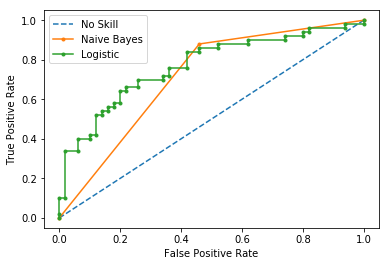

In [247]:
# predict probabilities
nb_probs = classifier_nb.predict_proba(X_test)
lr_probs = classifier_lr.predict_proba(X_test)

# keep probabilities for the positive outcome only
ns_probs = [0 for _ in range(len(y_test))]
nb_probs = nb_probs[:, 1]
lr_probs = lr_probs[:, 1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: \n\t\tROC AUC=%.3f' % (ns_auc))
print('Naive Bayes: \n\t\tROC AUC=%.3f' % (nb_auc))
print('Logistic: \n\t\tROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, ns_thresholds  = roc_curve(y_test, ns_probs)
nb_fpr, nb_tpr, nb_thresholds  = roc_curve(y_test, nb_probs)
lr_fpr, lr_tpr, lr_thresholds  = roc_curve(y_test, lr_probs)

#get roc curve metrics
from IPython.display import display

ns_df = pd.DataFrame(data=[])
ns_df['threshold'] = ns_thresholds
ns_df['tpr'] = ns_tpr
ns_df['fpr'] = ns_fpr
display(ns_df)

nb_df = pd.DataFrame(data=[])
nb_df['threshold'] = nb_thresholds
nb_df['tpr'] = nb_tpr
nb_df['fpr'] = nb_fpr
display(nb_df)

lr_df = pd.DataFrame(data=[])
lr_df['threshold'] = lr_thresholds
lr_df['tpr'] = lr_tpr
lr_df['fpr'] = lr_fpr
display(lr_df)

# plot the roc curve for the model

fig, ax1 = pyplot.subplots()

ax1.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
ax1.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes')
ax1.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')

# axis labels
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')

# show the legend
pyplot.legend()

# show the plot
pyplot.show()

# define a function that accepts a threshold and prints sensitivity and specificity
#def evaluate_threshold_lr(threshold):
#    print('LR Sensitivity:', lr_tpr[lr_thresholds > threshold][-1])
#    print('LR Specificity:', 1 - lr_fpr[lr_thresholds > threshold][-1])
#    
#def evaluate_threshold_nb(threshold):
#    print('NB Sensitivity:', nb_tpr[nb_thresholds > threshold][-1])
#    print('NB Specificity:', 1 - nb_fpr[nb_thresholds > threshold][-1])
#
#evaluate_threshold_lr(5.654338e-41)
#evaluate_threshold_nb(5.654338e-41)
#
#evaluate_threshold_lr(0.357685)
#evaluate_threshold_nb(0.357685)
#
#evaluate_threshold_lr(0.5)
#evaluate_threshold_nb(0.5)
#
#evaluate_threshold_lr(0.75)
#evaluate_threshold_nb(0.75)